# AMPEROMETRO

OBIETTIVO: stima della resistenza interna dell'amperometro

usando resistenze dell'ordine dei Ω misuriamo la corrente di una resistenza equivalente data da $R_{eq} = R_a + R$

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

NOTA: a disposizione avevamo solo a disposizione resistenze con valori interi da 1 a 10 Ω

In [2]:
dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'amperometro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(OHM)']) - 0.2 # ohm
sigmaRpercent = 0.01
sigmaR = R*sigmaRpercent

V = np.array(fr['V']) # volt
sigmaVpercent = 0.01
sigmaV = V*sigmaVpercent

I = np.array(fr['I(mA)']) * 10**-3 # milli ampere
sigmaIpercent = 0.01
sigmaI = I*sigmaIpercent

In [3]:
def f(vi,Ra):
    return vi - Ra

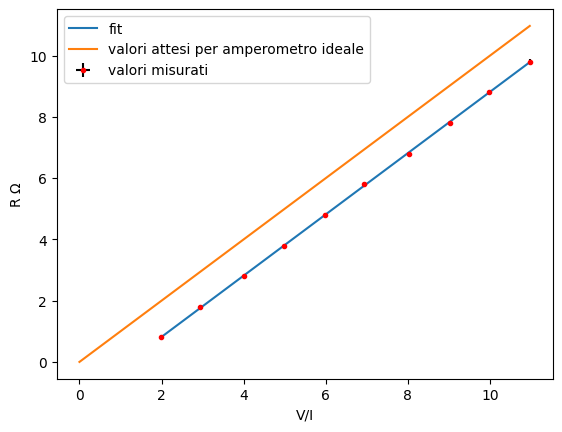

In [4]:
i = Interpolazione(V/I,R,f,sigmaR,p0=[1])
vi = np.linspace(0,max(V/I),100)

plt.plot(i.x_best,i.y_best,label='fit')
plt.errorbar(V/I,R,fmt='.',color='red',yerr=sigmaR,xerr=0.01*np.sqrt(2),label='valori misurati',ecolor='black')
plt.plot(vi,vi,label='valori attesi per amperometro ideale')
plt.xlabel('V/I')
plt.ylabel('R $\Omega$')
plt.legend()
plt.show()

In [5]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

In [6]:
Ra = V/I - R
N = len(Ra)

sigmaRa = np.sqrt(((V/I)**2)*(sigmaV**2/(V**2) + sigmaI**2/(I**2)) + sigmaR**2)

avg_Ra = np.average(Ra,weights=1/(sigmaRa**2))
sigma_avg_Ra = np.sqrt(np.sum((Ra - avg_Ra)**2)/(N-1))/np.sqrt(N)

### Calcolo $R_a$

In [9]:
print(final_val(avg_Ra,sigma_avg_Ra,decimals=3,udm='Ω'))

1.18 ± 0.012 Ω
